# Imports

In [364]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', 100)


# Loads

In [365]:
# Helper function to fix columns
def load_and_fix(path):
    df = pd.read_csv(path)
    df['avg_fitness_progress'] = df['avg_fitness_progress'].apply(ast.literal_eval)
    df['best_solution'] = df['best_solution'].apply(ast.literal_eval)
    return df

# Load and fix all datasets
df_phase1 = load_and_fix('../results/phase1.csv')

df_simple_phase2 = load_and_fix('../results/simple_phase2.csv')
df_simple_phase3 = load_and_fix('../results/simple_phase3.csv')
df_simple_phase4 = load_and_fix('../results/simple_phase4.csv')

df_advanced_phase2 = load_and_fix('../results/advanced_phase2.csv')
df_advanced_phase3 = load_and_fix('../results/advanced_phase3.csv')
df_advanced_phase4 = load_and_fix('../results/advanced_phase4.csv')


all_dfs = [df_phase1, df_simple_phase2, df_simple_phase3, df_simple_phase4,
           df_advanced_phase2, df_advanced_phase3, df_advanced_phase4]
combined = pd.concat(all_dfs)

GLOBAL_STATS = {
    'avg_fitness': (combined['avg_fitness'].min(), combined['avg_fitness'].max()),
    'max_fitness': (combined['max_fitness'].min(), combined['max_fitness'].max()),
    'std_fitness': (combined['std_fitness'].min(), combined['std_fitness'].max()),
    'avg_generations': (combined['avg_generations'].min(), combined['avg_generations'].max()),
    'max_generations': (0, combined['max_generations'].max())

}

# Composite Score

In [366]:


# Composite scoring function with built-in normalization
def composite_score(row):
    weights = {
        'avg_fitness': 1.0,
        'max_fitness': 0.5,
        'std_fitness': -0.3,  # Negative weight because lower std is better
        'avg_generations': -0.3  # Negative weight because fewer generations is better
    }
    
    # Normalize each metric to [0,1]
    def normalize(metric, value):
        min_val, max_val = GLOBAL_STATS[metric]
        if metric in ['std_fitness', 'avg_generations']:  # Invert normalization for minimization metrics
            return (max_val - value) / (max_val - min_val)
        return (value - min_val) / (max_val - min_val)
    
    # Calculate weighted score
    score = 0
    for metric, weight in weights.items():
        norm_value = normalize(metric, row[metric])
        score += weight * norm_value
        
    return score

# Apply to all dataframes
for df in all_dfs:
    df['composite_score'] = df.apply(composite_score, axis=1)

In [367]:
top_number=5

top_simple_phase1 = df_phase1[(df_phase1['selection'].isin(['roulette', 'ranking', 'tournament']))].nlargest(top_number, 'composite_score')
top_simple_phase2 = df_simple_phase2.nlargest(top_number, 'composite_score')
top_simple_phase3 = df_simple_phase3.nlargest(top_number, 'composite_score')
top_simple_phase4 = df_simple_phase4.nlargest(top_number, 'composite_score')
top_advanced_phase1 = df_phase1[(df_phase1['selection'].isin(["stochastic", "boltzmann"]))].nlargest(top_number, 'composite_score')
top_advanced_phase2 = df_advanced_phase2.nlargest(top_number, 'composite_score')
top_advanced_phase3 = df_advanced_phase3.nlargest(top_number, 'composite_score')
top_advanced_phase4 = df_advanced_phase4.nlargest(top_number, 'composite_score')

# Methods Comparation

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi

# Set color palette
main_palette = ["#1f77b4", "#ff7f0e"]  # Blue and Orange
gradient_palette = sns.color_palette("Blues_r", n_colors=2) + sns.color_palette("Oranges_r", n_colors=3)

C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='selection', y='avg_fitness', data=df_phase1,
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='selection', y='max_fitness', data=df_phase1,


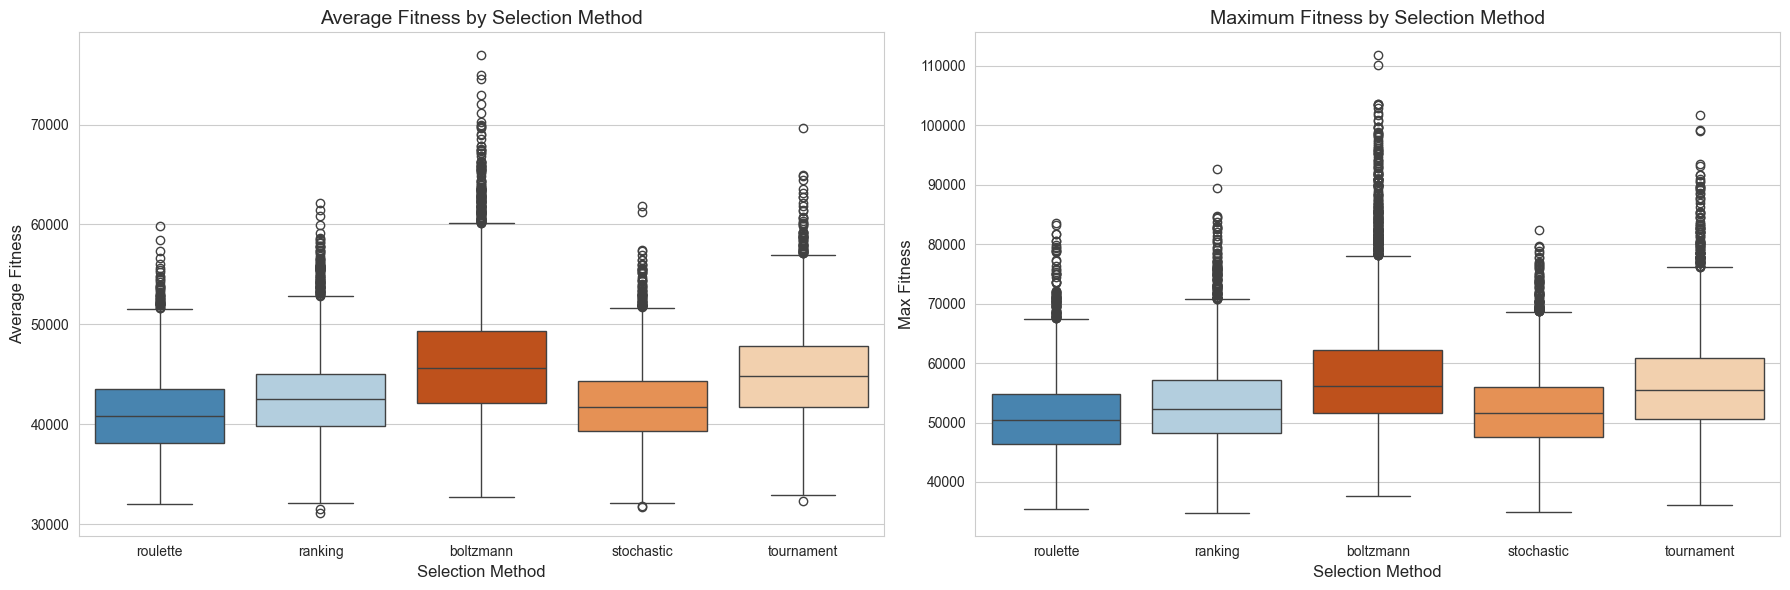

C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:25: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='selection', y='avg_fitness', hue='crossover',
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:33: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='selection', y='max_fitness', hue='crossover',
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:41: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='selection', y='avg_fitness', hue='mutation',
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\4561532.py:49: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='selection', y='max_fitness', hue='mutation',


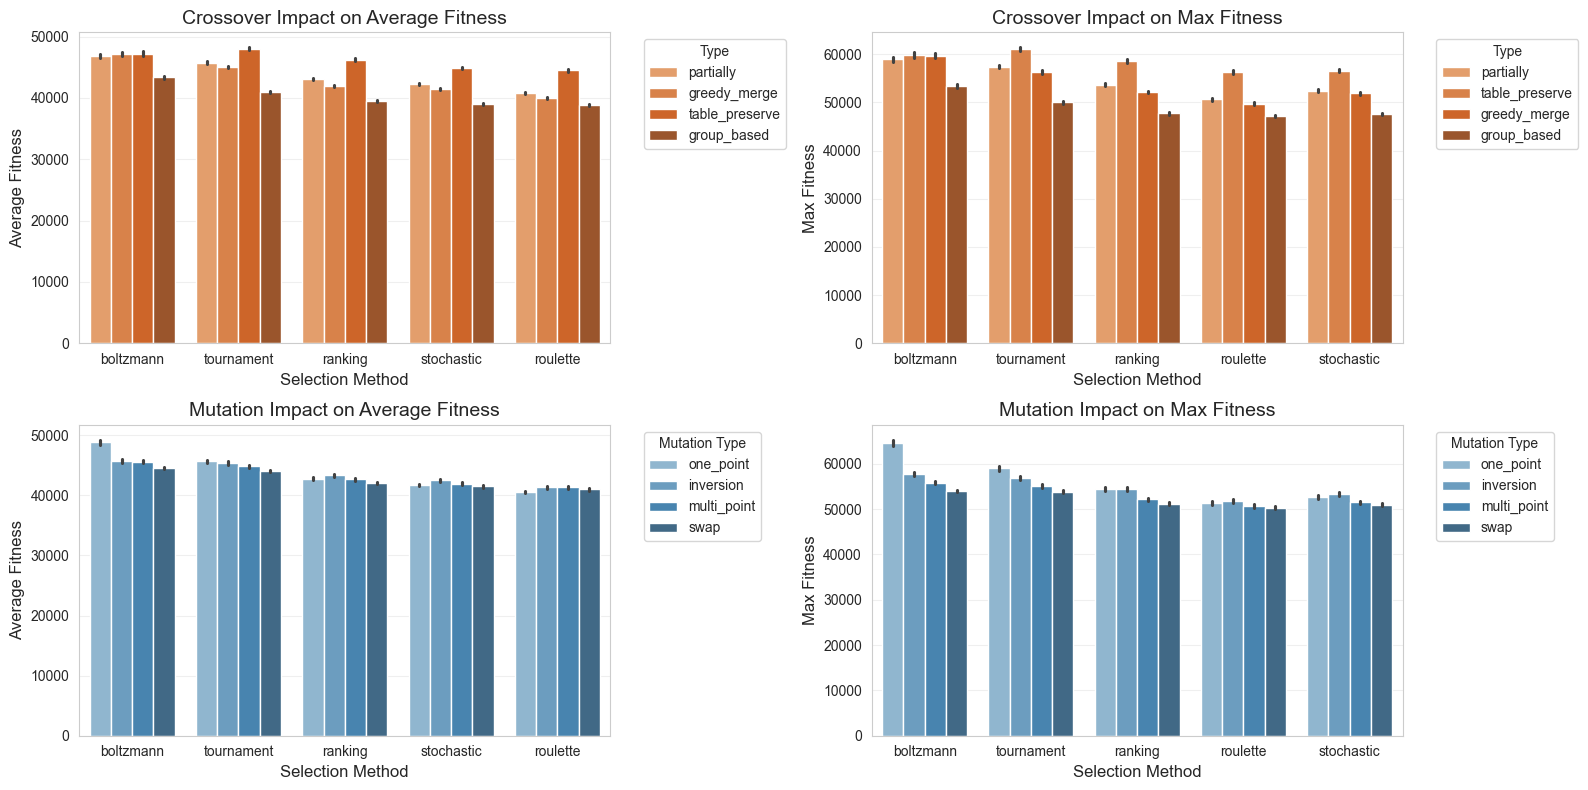

In [369]:
# 1. Selection Method Comparison (Avg vs Max Fitness)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Average Fitness
sns.boxplot(x='selection', y='avg_fitness', data=df_phase1, 
           palette=gradient_palette, ax=ax[0])
ax[0].set_title('Average Fitness by Selection Method', fontsize=14)
ax[0].set_xlabel('Selection Method', fontsize=12)
ax[0].set_ylabel('Average Fitness', fontsize=12)

# Max Fitness
sns.boxplot(x='selection', y='max_fitness', data=df_phase1,
           palette=gradient_palette, ax=ax[1])
ax[1].set_title('Maximum Fitness by Selection Method', fontsize=14)
ax[1].set_xlabel('Selection Method', fontsize=12)
ax[1].set_ylabel('Max Fitness', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Crossover & Mutation Impact Analysis
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Crossover - Average Fitness
sns.barplot(x='selection', y='avg_fitness', hue='crossover',
          data=df_phase1.sort_values('avg_fitness', ascending=False),
          palette=sns.color_palette("Oranges_d", n_colors=5),
          ax=axs[0,0])
axs[0,0].set_title('Crossover Impact on Average Fitness', fontsize=14)
axs[0,0].set_ylabel('Average Fitness', fontsize=12)

# Crossover - Max Fitness
sns.barplot(x='selection', y='max_fitness', hue='crossover',
          data=df_phase1.sort_values('max_fitness', ascending=False),
          palette=sns.color_palette("Oranges_d", n_colors=5),
          ax=axs[0,1])
axs[0,1].set_title('Crossover Impact on Max Fitness', fontsize=14)
axs[0,1].set_ylabel('Max Fitness', fontsize=12)

# Mutation - Average Fitness
sns.barplot(x='selection', y='avg_fitness', hue='mutation',
          data=df_phase1.sort_values('avg_fitness', ascending=False),
          palette=sns.color_palette("Blues_d", n_colors=5),
          ax=axs[1,0])
axs[1,0].set_title('Mutation Impact on Average Fitness', fontsize=14)
axs[1,0].set_ylabel('Average Fitness', fontsize=12)

# Mutation - Max Fitness
sns.barplot(x='selection', y='max_fitness', hue='mutation',
          data=df_phase1.sort_values('max_fitness', ascending=False),
          palette=sns.color_palette("Blues_d", n_colors=5),
          ax=axs[1,1])
axs[1,1].set_title('Mutation Impact on Max Fitness', fontsize=14)
axs[1,1].set_ylabel('Max Fitness', fontsize=12)

# Formatting
for ax in axs.flatten():
    ax.set_xlabel('Selection Method', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), title='Type' if ax in axs[0] else 'Mutation Type')

plt.tight_layout()
plt.show()

C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\3632968797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crossover', y='avg_fitness', data=df_phase1,
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\3632968797.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='crossover', y='avg_fitness', data=df_phase1,
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\3632968797.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='crossover', y='max_fitness', data=df_phase1,
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\3632968797.py:12: UserWarning: The palette

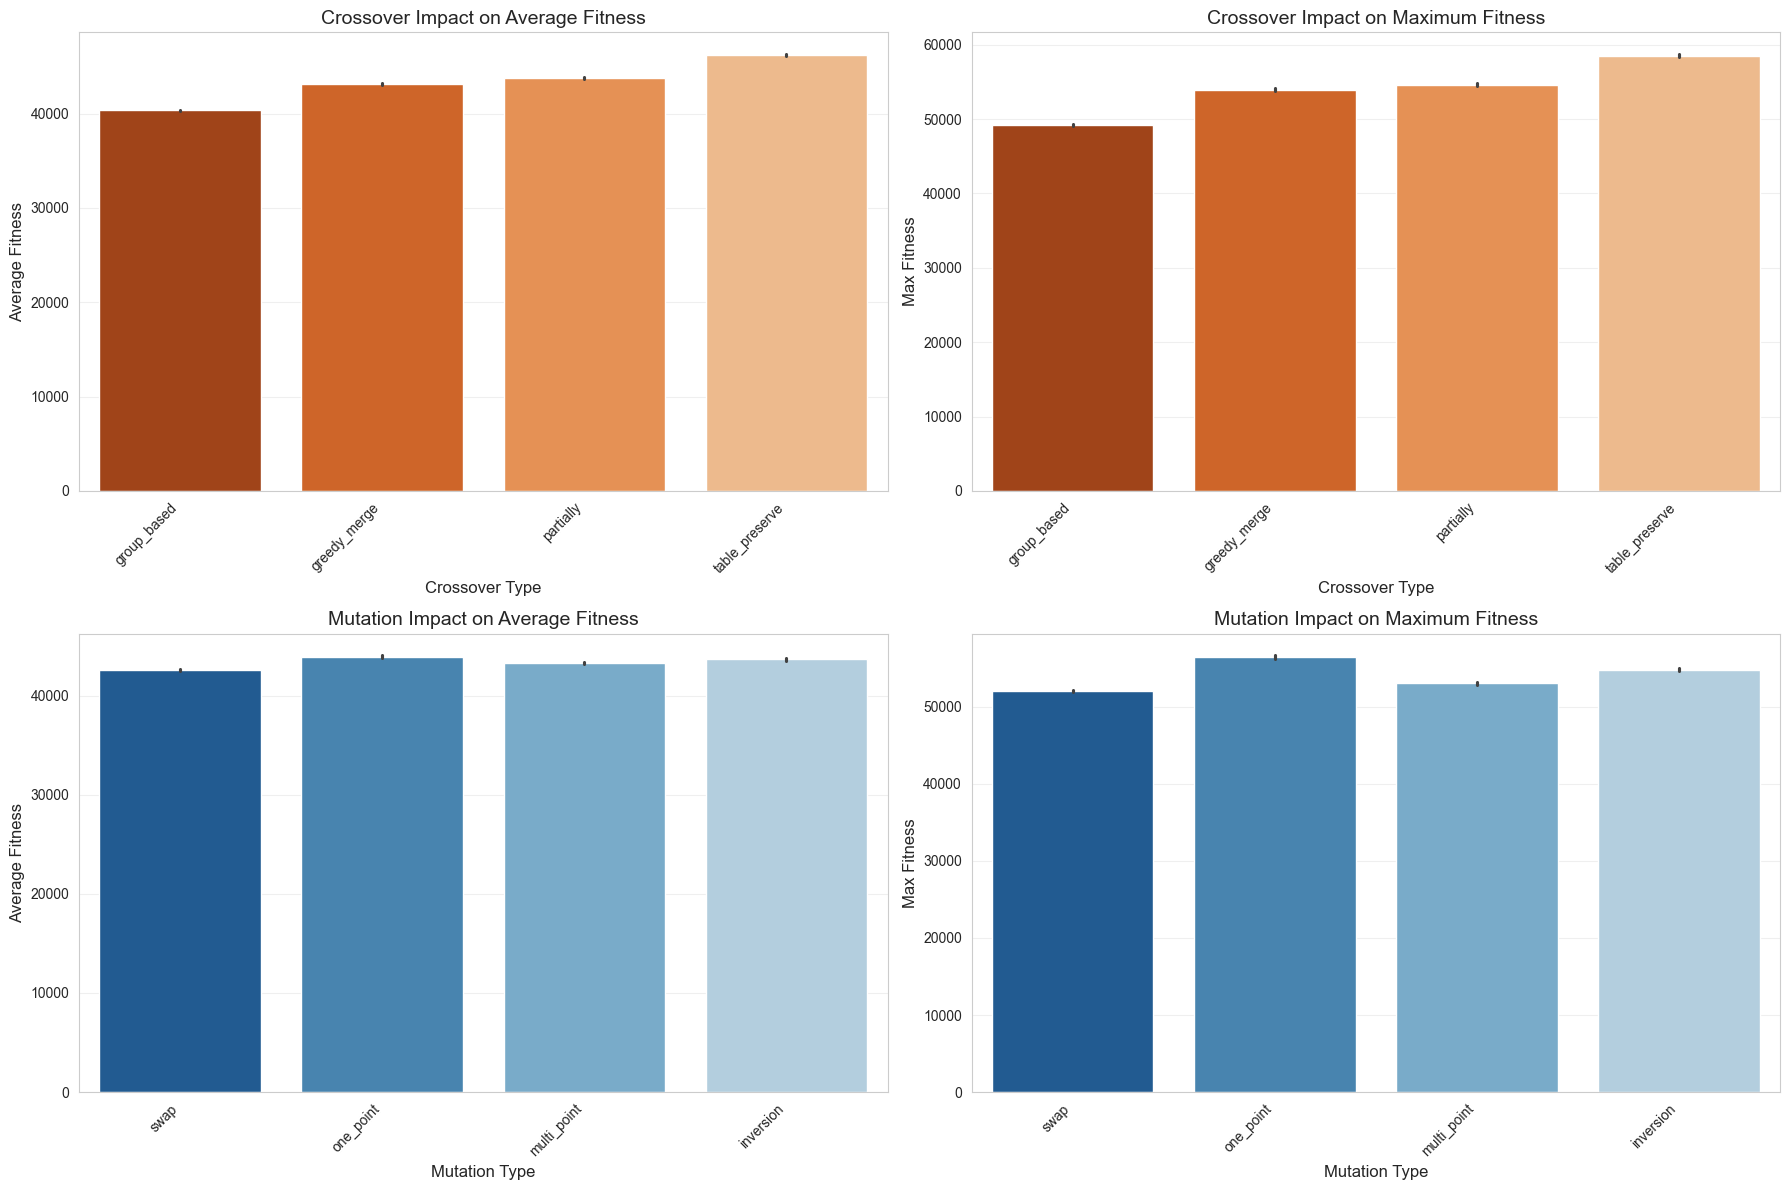

In [370]:
# 2. Crossover & Mutation Effectiveness (Avg vs Max Fitness)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Crossover - Average Fitness
sns.barplot(x='crossover', y='avg_fitness', data=df_phase1,
            palette=sns.color_palette("Oranges_r", n_colors=5), ax=axs[0,0])
axs[0,0].set_title('Crossover Impact on Average Fitness', fontsize=14)
axs[0,0].set_xlabel('Crossover Type', fontsize=12)
axs[0,0].set_ylabel('Average Fitness', fontsize=12)

# Crossover - Max Fitness
sns.barplot(x='crossover', y='max_fitness', data=df_phase1,
            palette=sns.color_palette("Oranges_r", n_colors=5), ax=axs[0,1])
axs[0,1].set_title('Crossover Impact on Maximum Fitness', fontsize=14)
axs[0,1].set_xlabel('Crossover Type', fontsize=12)
axs[0,1].set_ylabel('Max Fitness', fontsize=12)

# Mutation - Average Fitness
sns.barplot(x='mutation', y='avg_fitness', data=df_phase1,
            palette=sns.color_palette("Blues_r", n_colors=5), ax=axs[1,0])
axs[1,0].set_title('Mutation Impact on Average Fitness', fontsize=14)
axs[1,0].set_xlabel('Mutation Type', fontsize=12)
axs[1,0].set_ylabel('Average Fitness', fontsize=12)

# Mutation - Max Fitness
sns.barplot(x='mutation', y='max_fitness', data=df_phase1,
            palette=sns.color_palette("Blues_r", n_colors=5), ax=axs[1,1])
axs[1,1].set_title('Mutation Impact on Maximum Fitness', fontsize=14)
axs[1,1].set_xlabel('Mutation Type', fontsize=12)
axs[1,1].set_ylabel('Max Fitness', fontsize=12)

# Formatting
for ax in axs.flat:
    ax.grid(axis='y', alpha=0.3)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\2490913698.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\ASUS.LAPTOP-SFDPA4G4\AppData\Local\Temp\ipykernel_15280\2490913698.py:24: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


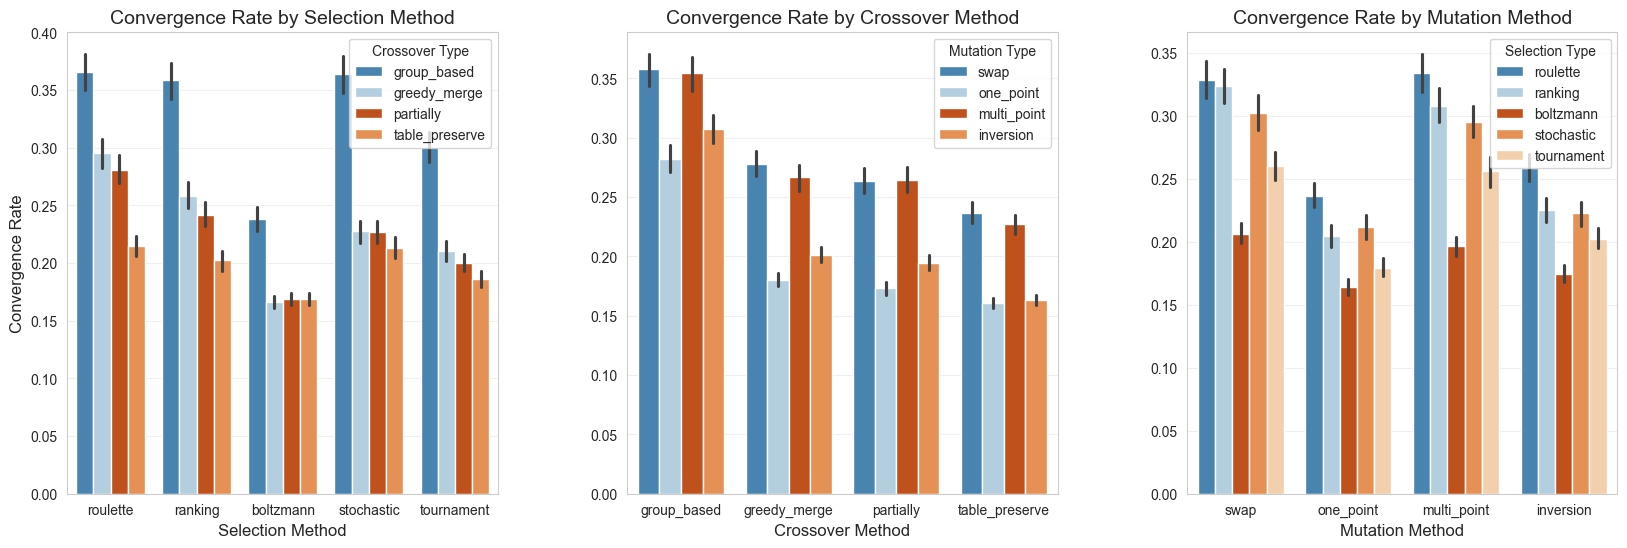

In [371]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Create subplots  
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  
plt.subplots_adjust(wspace=0.3)  

# Plot 1: Selection Methods  
sns.barplot(  
    ax=axes[0],  
    x='selection',  
    y='convergence_rate',  
    hue='crossover',  
    data=df_phase1,  
    palette=gradient_palette  # Blue and Orange  
)  
axes[0].set_title('Convergence Rate by Selection Method', fontsize=14)  
axes[0].set_xlabel('Selection Method', fontsize=12)  
axes[0].set_ylabel('Convergence Rate', fontsize=12)  
axes[0].legend(title='Crossover Type')  
axes[0].grid(axis='y', alpha=0.3)  

# Plot 2: Crossover Methods  
sns.barplot(  
    ax=axes[1],  
    x='crossover',  
    y='convergence_rate',  
    hue='mutation',  
    data=df_phase1,  
    palette=gradient_palette  # Blue and Orange  
)  
axes[1].set_title('Convergence Rate by Crossover Method', fontsize=14)  
axes[1].set_xlabel('Crossover Method', fontsize=12)  
axes[1].set_ylabel('')  
axes[1].legend(title='Mutation Type')  
axes[1].grid(axis='y', alpha=0.3)  

# Plot 3: Mutation Methods  
sns.barplot(  
    ax=axes[2],  
    x='mutation',  
    y='convergence_rate',  
    hue='selection',  
    data=df_phase1,  
    palette=gradient_palette  # Blue and Orange  
)  
axes[2].set_title('Convergence Rate by Mutation Method', fontsize=14)  
axes[2].set_xlabel('Mutation Method', fontsize=12)  
axes[2].set_ylabel('')  
axes[2].legend(title='Selection Type' )
axes[2].grid(axis='y', alpha=0.3)  

plt.show()  

# Simple vs Advanced

In [372]:
def format_top_configs(*dfs, config_type='Simple'):
    """Process top configurations for Simple or Advanced phases"""
    summary_data = []
    for i, df in enumerate(dfs, start=1):
        for idx, row in df.head(top_number).iterrows():  # Take top 10 from each phase
            summary_data.append({
                'Phase': f'{config_type} Phase {i}',
                'avg_fitness': round(row['avg_fitness'],0),
                'max_fitness': round(row['max_fitness'],0),
                'std_fitness': round(row['std_fitness'],0),
                'avg_generations': row['avg_generations'],
                'selection': row['selection'],
                'crossover': row['crossover'],
                'mutation': row['mutation']
            })
    return pd.DataFrame(summary_data)

summary_simple = format_top_configs(
    top_simple_phase1, top_simple_phase2, top_simple_phase3,top_simple_phase4,
    config_type='Simple'
)

summary_advanced = format_top_configs(
    top_advanced_phase1, top_advanced_phase2, top_advanced_phase3, top_advanced_phase4,# Add your advanced phases here
    config_type='Advanced'
)

# Create pivot tables
def create_pivot(summary_df, title):
    pivot = summary_df.pivot_table(
        index=[summary_df.groupby('Phase').cumcount() + 1],
        columns='Phase',
        values=['avg_fitness', 'max_fitness', 'std_fitness', 'avg_generations'],
        aggfunc='first'
    )
    pivot.index.name = 'Rank'
    pivot.columns.names = ['Metric', 'Phase']
    return pivot.style.format("{:.2f}").set_caption(title)

# Display separated tables
display(create_pivot(summary_simple, f"Top {top_number} Simple Configurations per Phase"))
display(create_pivot(summary_advanced, f"Top {top_number} Advanced Configurations per Phase"))

In [383]:
def format_config_table(df, config_type, phase):
    if df.empty:
        return f"\nNo {config_type} configurations for {phase}.\n"
    
    # Select relevant columns and sort by composite score
    top_configs = df.sort_values('composite_score', ascending=False).head(5)
    top_configs = top_configs[[
        'selection', 'crossover', 'mutation', 
        'cx_rate', 'mut_rate', 'elitism_percent',
        'avg_fitness', 'max_fitness'
    ]]
    
    # Format table
    table = f"\n===================================== {phase} - {config_type.upper()} Configurations =====================================\n"
    table += "Rank | Selection    | Crossover      | Mutation | CX Rate | Mut Rate | Elitism | Avg Fitness | Max Fitness\n"
    table += "-----|--------------|----------------|----------|---------|----------|---------|-------------|------------\n"
    
    for idx, row in top_configs.iterrows():
        table += (
            f"{idx+1:3} | "
            f"{row['selection'][:10]:<12} | "
            f"{row['crossover'][:12]:<14} | "
            f"{row['mutation'][:8]:<8} | "
            f"{row['cx_rate']:.2f}    | "
            f"{row['mut_rate']:.2f}     | "
            f"{row['elitism_percent']:.0%}     | "
            f"{row['avg_fitness']:.2f}       | "
            f"{row['max_fitness']:.2f}\n"
        )
    return table

# Generate reports for all phases
for phase_num in range(2, 5):
    phase_name = f"Phase {phase_num}"
    
    # Simple configurations
    simple_df=all_dfs[phase_num-1]
    print(format_config_table(simple_df, "Simple", phase_name))
for phase_num2 in range(2, 5):
    phase_name = f"Phase {phase_num2}"
    # Advanced configurations
    advanced_df = all_dfs[phase_num2+2]
    print(format_config_table(advanced_df, "Advanced", phase_name))

print("\nLegend:")
print("- CX Rate: Crossover Rate")
print("- Mut Rate: Mutation Rate")
print("- Elitism: Elitism Percentage")


===================================== Phase 2 - SIMPLE Configurations =====================================
Rank | Selection    | Crossover      | Mutation | CX Rate | Mut Rate | Elitism | Avg Fitness | Max Fitness
-----|--------------|----------------|----------|---------|----------|---------|-------------|------------
259 | tournament   | greedy_merge   | one_poin | 0.60    | 0.60     | 10%     | 80973.33       | 102700.00
263 | tournament   | greedy_merge   | one_poin | 0.60    | 0.70     | 10%     | 79870.00       | 102900.00
267 | tournament   | greedy_merge   | one_poin | 0.60    | 0.80     | 10%     | 78690.00       | 103900.00
268 | tournament   | greedy_merge   | one_poin | 0.60    | 0.80     | 25%     | 77133.33       | 100600.00
303 | tournament   | greedy_merge   | one_poin | 0.80    | 0.90     | 10%     | 75553.33       | 106000.00


===================================== Phase 3 - SIMPLE Configurations =====================================
Rank | Selection    | Crossover 

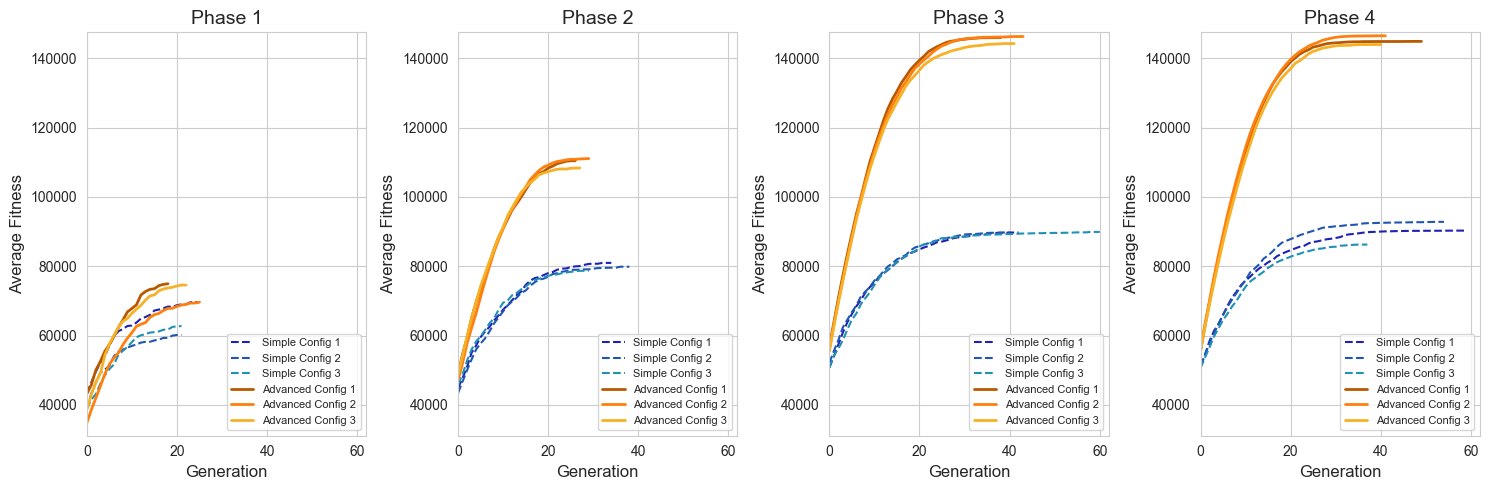

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors and phases
phases = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
simple_dfs = [top_simple_phase1, top_simple_phase2, top_simple_phase3, top_simple_phase4]
advanced_dfs = [top_advanced_phase1, top_advanced_phase2, top_advanced_phase3, top_advanced_phase4]  # Phase 1 has no advanced

# Custom palette with 5 blue shades for Simple and 1 orange for Advanced
palette = {
    'Simple': ["#1f21b4", "#1f56b4", "#1f91b4", "#65afe4", "#a3d4f0"],  # 5 blue gradients
    'Advanced': ["#b85900",'#ff7f0e',"#f6b127", "#fad242", "#f4fb26"]  # Single orange
}

plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

for i, phase in enumerate(phases):
    plt.subplot(1, 4, i+1)
    
    # Extract top 5 configurations for the phase
    top_simple = simple_dfs[i].nlargest(3, 'composite_score').reset_index(drop=True)
    top_advanced = advanced_dfs[i].nlargest(3, 'composite_score').reset_index(drop=True) if advanced_dfs[i] is not None else None
    
    # Plot Simple (blue gradients, dashed)
    for idx, row in top_simple.iterrows():
        plt.plot(
            row['avg_fitness_progress'],
            color=palette['Simple'][idx],  # Cycle through blue shades
            linestyle='--',
            linewidth=1.5,
            label=f'Simple Config {idx+1}'  # Unique label for each line
        )
    
    # Plot Advanced (orange, solid) if available
    if top_advanced is not None:
        for idx, row in top_advanced.iterrows():
            plt.plot(
                row['avg_fitness_progress'],
                color=palette['Advanced'][idx],
                linestyle='-',
                linewidth=2,
                label=f'Advanced Config {idx+1}' 
            )
    
    plt.title(f'{phase}', fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Average Fitness', fontsize=12)
    plt.ylim(GLOBAL_STATS['avg_fitness'][0], GLOBAL_STATS['avg_fitness'][1])
    
    plt.title(f'{phase}', fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.xlim(GLOBAL_STATS['max_generations'][0], GLOBAL_STATS['max_generations'][1])
    plt.ylabel('Average Fitness', fontsize=12)
    plt.ylim(GLOBAL_STATS['avg_fitness'][0], GLOBAL_STATS['avg_fitness'][1]+1000)  # Global scaling
    plt.legend(prop={"size": 8},loc='lower right')
    

plt.tight_layout()
plt.show()